In [17]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
from sklearn import preprocessing
import seaborn as sns
sns.set_theme(style="darkgrid")

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Import data, and remove oddities such as , and . being switched, letter where numbers where expected, and convert everything to the right datatype

In [2]:
data=pd.read_csv("data.tab", sep='\t', header=None, names = ["id", "runday", "country", "date", "new_deaths_smoothed_per_million", "stringency_index", "median_age", "gdp_per_capita", "tour_inc_gdp", "civilliberties", "trustp", "icu_bed", "lr", "plurality", "oppfrac", "govfrac", "checks"])
# data = data.stack().str.replace(',','.').unstack()
# data.to_csv("data.csv")
data.loc[data['country'] == "Portugal"].head()

for col in data.columns.drop(['country', 'date']):
    data[col] = data[col].astype("string").str.replace(',','.').str.replace(r'[^0-9_._e_-]+', '')
    # for value in col:
        # if value.astype("string") =
    # dfObject['C'] = dfObject['C'].str.replace(r'[^0-9]+', '')
data = data.replace('', np.NaN)

#leave the string collumns, then convert cols to int or float as needed.
for col in data.columns.drop(['country', 'date']):
    # display(col)
    if col in ['id', 'runday', 'civilliberties', 'plurality', 'checks']:
        data[col] = data[col].astype("int")
    else:
        data[col] = data[col].astype("float")
     # data[col] = data[col].astype("float")
data['country'] = data['country'].astype('string')
    
# data.head(8)

data = data.interpolate(method='ffill')
data.describe()

C:\Users\thijs\AppData\Local\Temp\ipykernel_10812\2345014661.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  data[col] = data[col].astype("string").str.replace(',','.').str.replace(r'[^0-9_._e_-]+', '')


,id,runday,new_deaths_smoothed_per_million,stringency_index,median_age,gdp_per_capita,tour_inc_gdp,civilliberties,trustp,icu_bed,lr,plurality,oppfrac,govfrac,checks
count,13790.000000,13790.000000,13790.000000,13790.000000,13790.000000,13790.000000,13790.000000,13790.000000,13790.000000,13790.000000,13790.000000,13790.000000,1.379000e+04,13790.000000,13790.000000
mean,13.961059,301.883974,3.246308,58.057751,43.242719,37198.938408,2.593785,54.083901,0.007544,-0.053961,0.001482,0.518492,5.999255e-01,0.410202,4.611820
std,7.780280,147.872652,4.536942,18.347044,2.049335,12308.900198,1.817279,4.225237,1.027057,0.985068,0.969256,0.499676,1.844379e-01,0.264684,1.895735
min,1.000000,6.000000,-4.965000,0.000000,38.700000,18563.307000,0.400000,43.000000,-1.429213,-1.171456,-1.638504,0.000000,1.110000e-16,0.000000,2.000000
25%,7.000000,174.000000,0.206000,47.690000,41.800000,27216.445000,1.400000,52.000000,-0.782871,-0.816946,-1.056273,0.000000,4.855860e-01,0.204638,3.000000
50%,14.000000,302.000000,1.073000,59.720000,43.200000,34272.360000,1.800000,55.000000,-0.244252,-0.323715,0.357719,1.000000,6.390024e-01,0.440769,4.000000
75%,21.000000,430.000000,4.785000,71.300000,44.500000,45436.688000,3.500000,57.000000,0.294367,0.431545,0.720128,1.000000,7.306148e-01,0.682788,6.000000
max,27.000000,557.000000,28.770000,96.300000,47.900000,67335.300000,9.099999,60.000000,2.233395,3.406346,1.629123,1.000000,8.618726e-01,0.805245,10.000000


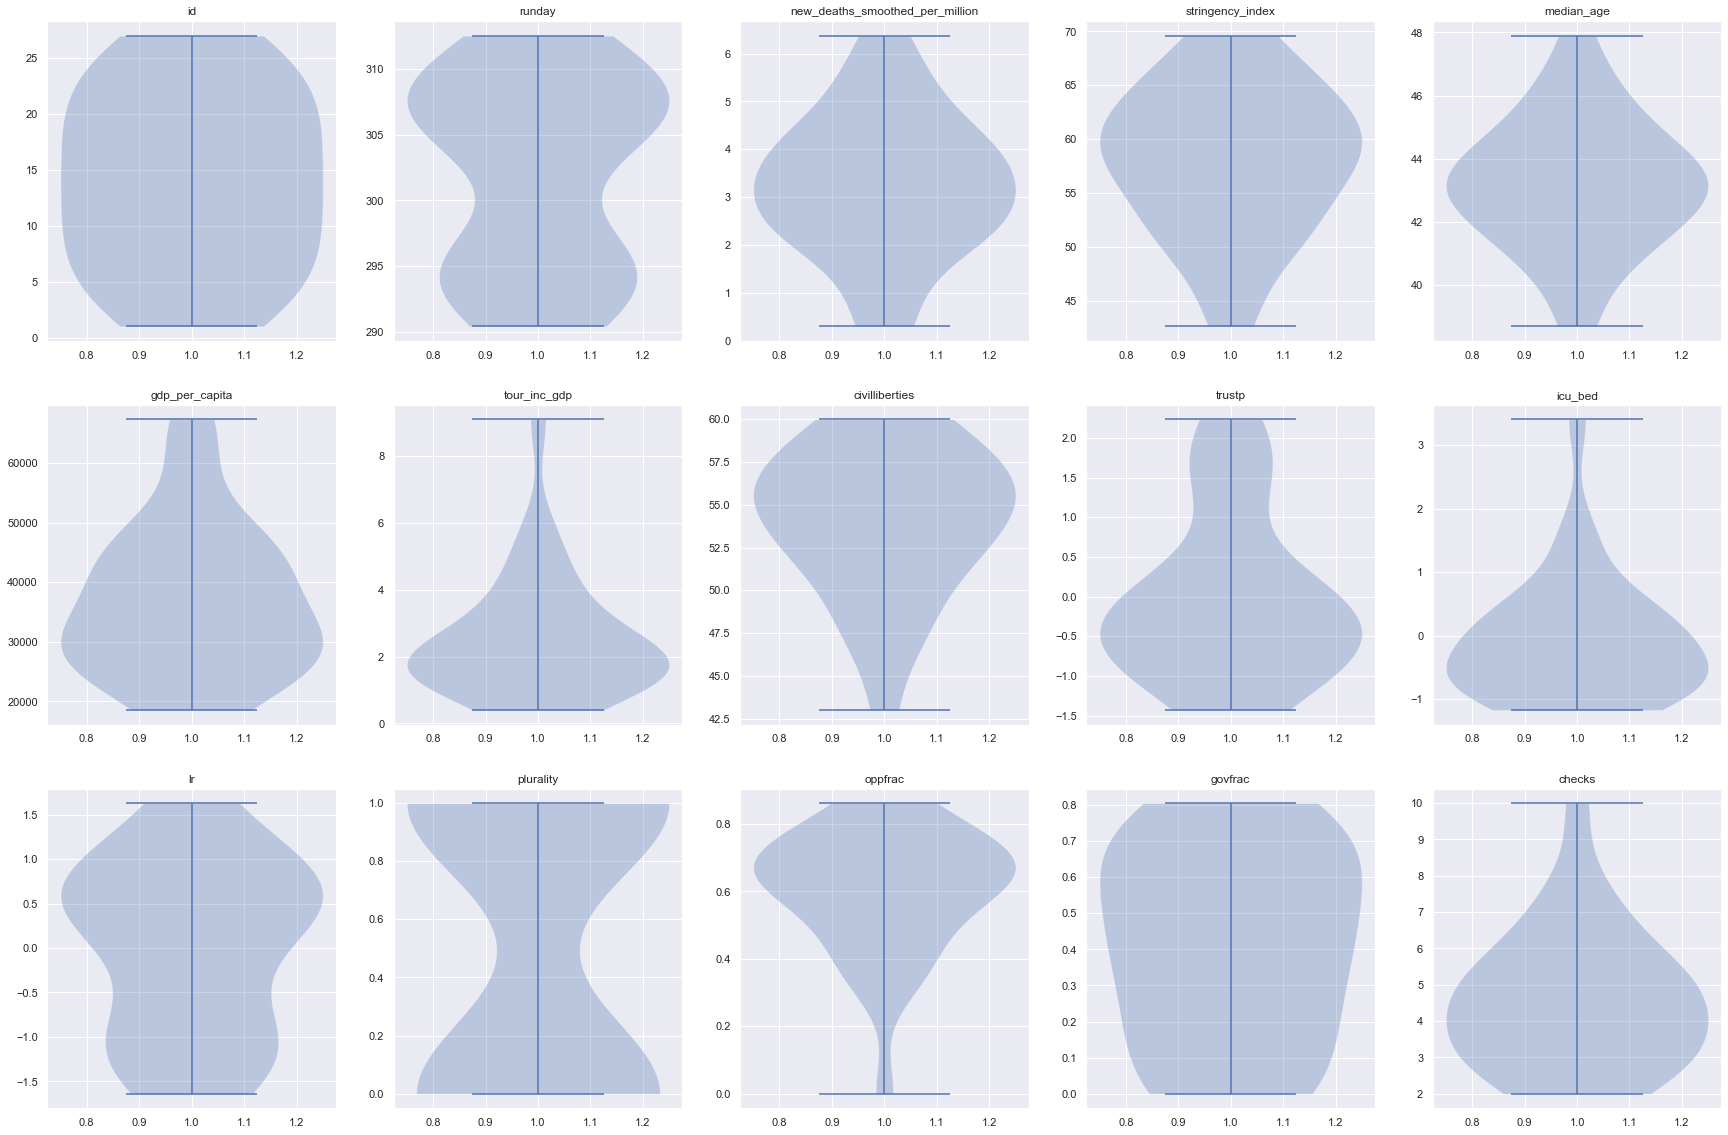

In [3]:
data_grouped = data.groupby("country")#.drop(['lr', 'plurality'], axis=1)
# display(data_grouped.mean())

plt.figure(figsize = (30,20))

for i,col in enumerate(data_grouped.mean(), 1):
    plt.subplot(3,5,i)
    plt.title(col)
    plt.violinplot(data_grouped.mean()[col])

Correlation matrix for all data together

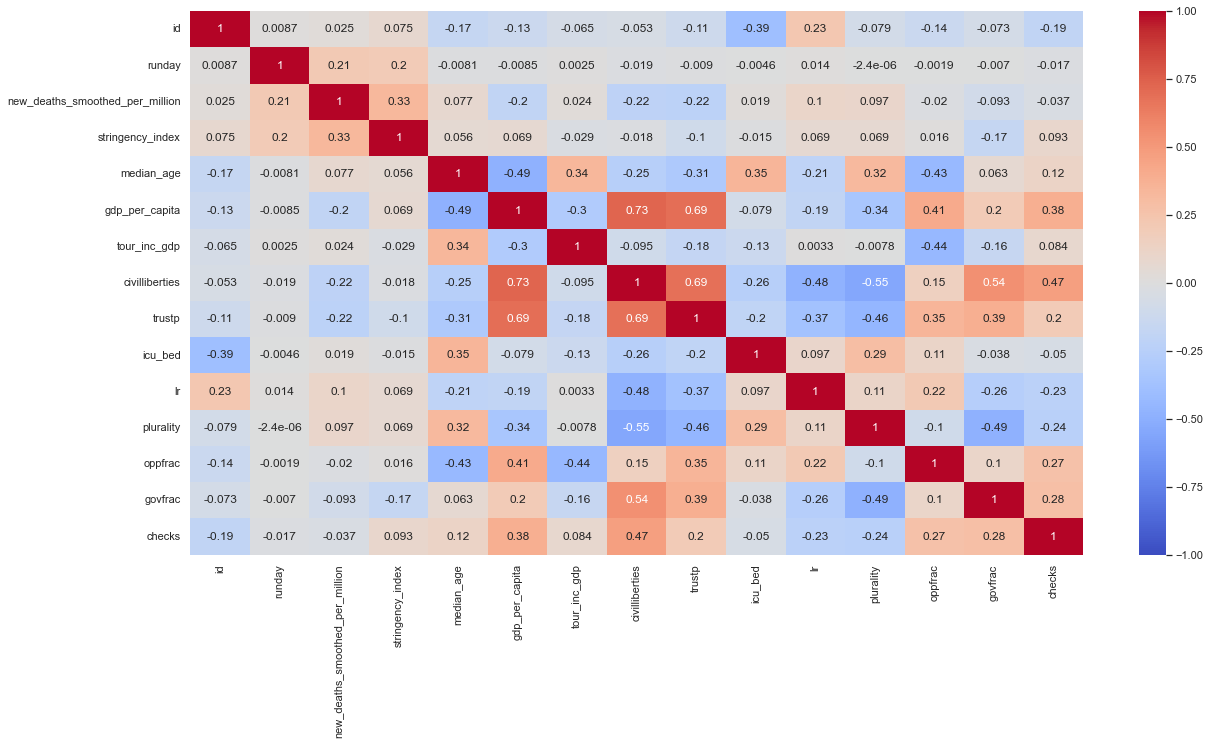

In [50]:
sns.set(rc = {'figure.figsize':(20, 10)})
dataplot = sns.heatmap(data.corr(), cmap="coolwarm", annot=True, vmin=-1, vmax=1)

In [49]:
countryData = data[data['country'] == "Belgium"]


# countryData.head()


countryData = countryData.drop(['country','date', 'plurality', 'lr'],axis=1).dropna()
countryData.head()
# sns.lineplot(x="runday", y="new_deaths_smoothed_per_million", data=data)


display(countryData.describe())


,id,runday,new_deaths_smoothed_per_million,stringency_index,median_age,gdp_per_capita,tour_inc_gdp,civilliberties,trustp,icu_bed,oppfrac,govfrac,checks
count,523.0,523.000000,523.000000,523.000000,5.230000e+02,5.230000e+02,5.230000e+02,523.0,5.230000e+02,5.230000e+02,5.230000e+02,5.230000e+02,523.0
mean,2.0,296.000000,4.207583,57.259235,4.180000e+01,4.265857e+04,1.400000e+00,57.0,7.891954e-02,6.319202e-01,8.618726e-01,6.827881e-01,7.0
std,0.0,151.121364,5.576630,16.244847,4.053971e-13,1.019609e-10,1.711380e-14,0.0,5.695340e-16,3.556115e-15,1.055722e-14,1.778058e-15,0.0
min,2.0,35.000000,-1.245000,11.110000,4.180000e+01,4.265857e+04,1.400000e+00,57.0,7.891954e-02,6.319202e-01,8.618726e-01,6.827881e-01,7.0
25%,2.0,165.500000,0.444000,50.930000,4.180000e+01,4.265857e+04,1.400000e+00,57.0,7.891954e-02,6.319202e-01,8.618726e-01,6.827881e-01,7.0
50%,2.0,296.000000,2.354000,60.190000,4.180000e+01,4.265857e+04,1.400000e+00,57.0,7.891954e-02,6.319202e-01,8.618726e-01,6.827881e-01,7.0
75%,2.0,426.500000,4.622500,63.425000,4.180000e+01,4.265857e+04,1.400000e+00,57.0,7.891954e-02,6.319202e-01,8.618726e-01,6.827881e-01,7.0
max,2.0,557.000000,28.770000,81.480000,4.180000e+01,4.265857e+04,1.400000e+00,57.0,7.891954e-02,6.319202e-01,8.618726e-01,6.827881e-01,7.0


In [5]:
display(countryData.dtypes)
countryData.isnull().values.any()

id                                   int32
runday                               int32
new_deaths_smoothed_per_million    float64
stringency_index                   float64
median_age                         float64
gdp_per_capita                     float64
tour_inc_gdp                       float64
civilliberties                       int32
trustp                             float64
icu_bed                            float64
oppfrac                            float64
govfrac                            float64
checks                               int32
dtype: object

False

In [6]:
def absolute_maximum_scale(x):
    # return series / series.abs().max()
    if x.max() == 0:
        x_norm = x
    else:
        x_norm = x / x.max(axis=0)
    return x_norm

countryData_normalised = pd.DataFrame()
for col in countryData.columns:#.drop(['country']):
    countryData_normalised[col] = absolute_maximum_scale(countryData[col])

# countryData_normalised = pd.DataFrame(preprocessing.normalize(countryData, axis=0),columns=names)

countryData_normalised.head()
# countryData_normalised.dropna().isnull().values.any()

,id,runday,new_deaths_smoothed_per_million,stringency_index,median_age,gdp_per_capita,tour_inc_gdp,civilliberties,trustp,icu_bed,oppfrac,govfrac,checks
502,1.0,0.658887,0.210810,0.738709,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
503,1.0,0.714542,0.132812,0.772705,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
504,1.0,0.109515,0.000000,0.136352,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
505,1.0,0.764811,0.078415,0.772705,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
506,1.0,0.165171,0.278485,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [59]:
pca = PCA(n_components = 2)
pca.fit(countryData_normalised)
countryData_transformed = pca.transform(countryData)
display(pca.explained_variance_ratio_, pca.explained_variance_)

loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=countryData_normalised.columns)
display(loadings)

array([0.49919929, 0.38735241])

array([0.09503422, 0.07374156])

,PC1,PC2
id,0.000000,4.163336e-17
runday,-0.541034,-7.790377e-01
new_deaths_smoothed_per_million,-0.581732,6.187328e-01
stringency_index,-0.607346,1.013414e-01
median_age,0.000000,0.000000e+00
gdp_per_capita,0.000000,0.000000e+00
tour_inc_gdp,0.000000,0.000000e+00
civilliberties,0.000000,0.000000e+00
trustp,0.000000,0.000000e+00
icu_bed,0.000000,0.000000e+00


Text(0, 0.5, 'Second Principal Component')

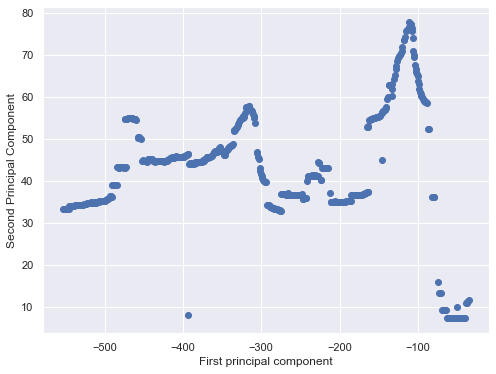

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(countryData_transformed[:,0],countryData_transformed[:,1])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')


In [96]:
display(countryData.loc[(countryData['stringency_index']<60) & (countryData['runday']>200)])

,id,runday,new_deaths_smoothed_per_million,stringency_index,median_age,gdp_per_capita,tour_inc_gdp,civilliberties,trustp,icu_bed,oppfrac,govfrac,checks
13275,12,548,0.240,51.39,40.8,39753.242,1.5,54,-1.241965,-0.801533,0.463341,0.0,3
13293,12,549,0.259,51.39,40.8,39753.242,1.5,54,-1.241965,-0.801533,0.463341,0.0,3
13307,12,489,0.229,59.72,40.8,39753.242,1.5,54,-1.241965,-0.801533,0.463341,0.0,3
13311,12,550,0.248,51.39,40.8,39753.242,1.5,54,-1.241965,-0.801533,0.463341,0.0,3
13325,12,490,0.206,59.72,40.8,39753.242,1.5,54,-1.241965,-0.801533,0.463341,0.0,3
13329,12,551,0.257,51.39,40.8,39753.242,1.5,54,-1.241965,-0.801533,0.463341,0.0,3
13343,12,491,0.202,59.72,40.8,39753.242,1.5,54,-1.241965,-0.801533,0.463341,0.0,3
13345,12,522,0.130,51.39,40.8,39753.242,1.5,54,-1.241965,-0.801533,0.463341,0.0,3
13347,12,552,0.269,51.39,40.8,39753.242,1.5,54,-1.241965,-0.801533,0.463341,0.0,3
13361,12,492,0.177,59.72,40.8,39753.242,1.5,54,-1.241965,-0.801533,0.463341,0.0,3


In [99]:
display(countryData.loc[(countryData['stringency_index']<30)])

,id,runday,new_deaths_smoothed_per_million,stringency_index,median_age,gdp_per_capita,tour_inc_gdp,civilliberties,trustp,icu_bed,oppfrac,govfrac,checks
13264,12,32,8.281,8.33,40.8,39753.242,1.5,54,-1.241965,-0.801533,0.463341,0.0,3
13266,12,61,0.000,11.11,40.8,39753.242,1.5,54,-1.241965,-0.801533,0.463341,0.0,3
13282,12,33,8.773,11.11,40.8,39753.242,1.5,54,-1.241965,-0.801533,0.463341,0.0,3
13284,12,62,0.000,11.11,40.8,39753.242,1.5,54,-1.241965,-0.801533,0.463341,0.0,3
13300,12,34,9.000,11.11,40.8,39753.242,1.5,54,-1.241965,-0.801533,0.463341,0.0,3
13302,12,63,0.000,11.11,40.8,39753.242,1.5,54,-1.241965,-0.801533,0.463341,0.0,3
13318,12,35,9.112,11.11,40.8,39753.242,1.5,54,-1.241965,-0.801533,0.463341,0.0,3
13320,12,64,0.000,11.11,40.8,39753.242,1.5,54,-1.241965,-0.801533,0.463341,0.0,3
13336,12,36,0.000,11.11,40.8,39753.242,1.5,54,-1.241965,-0.801533,0.463341,0.0,3
13338,12,65,0.000,11.11,40.8,39753.242,1.5,54,-1.241965,-0.801533,0.463341,0.0,3


C:\Users\thijs\AppData\Local\Temp\ipykernel_10812\3771078139.py:27: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(points, ax=axes.ravel().tolist())


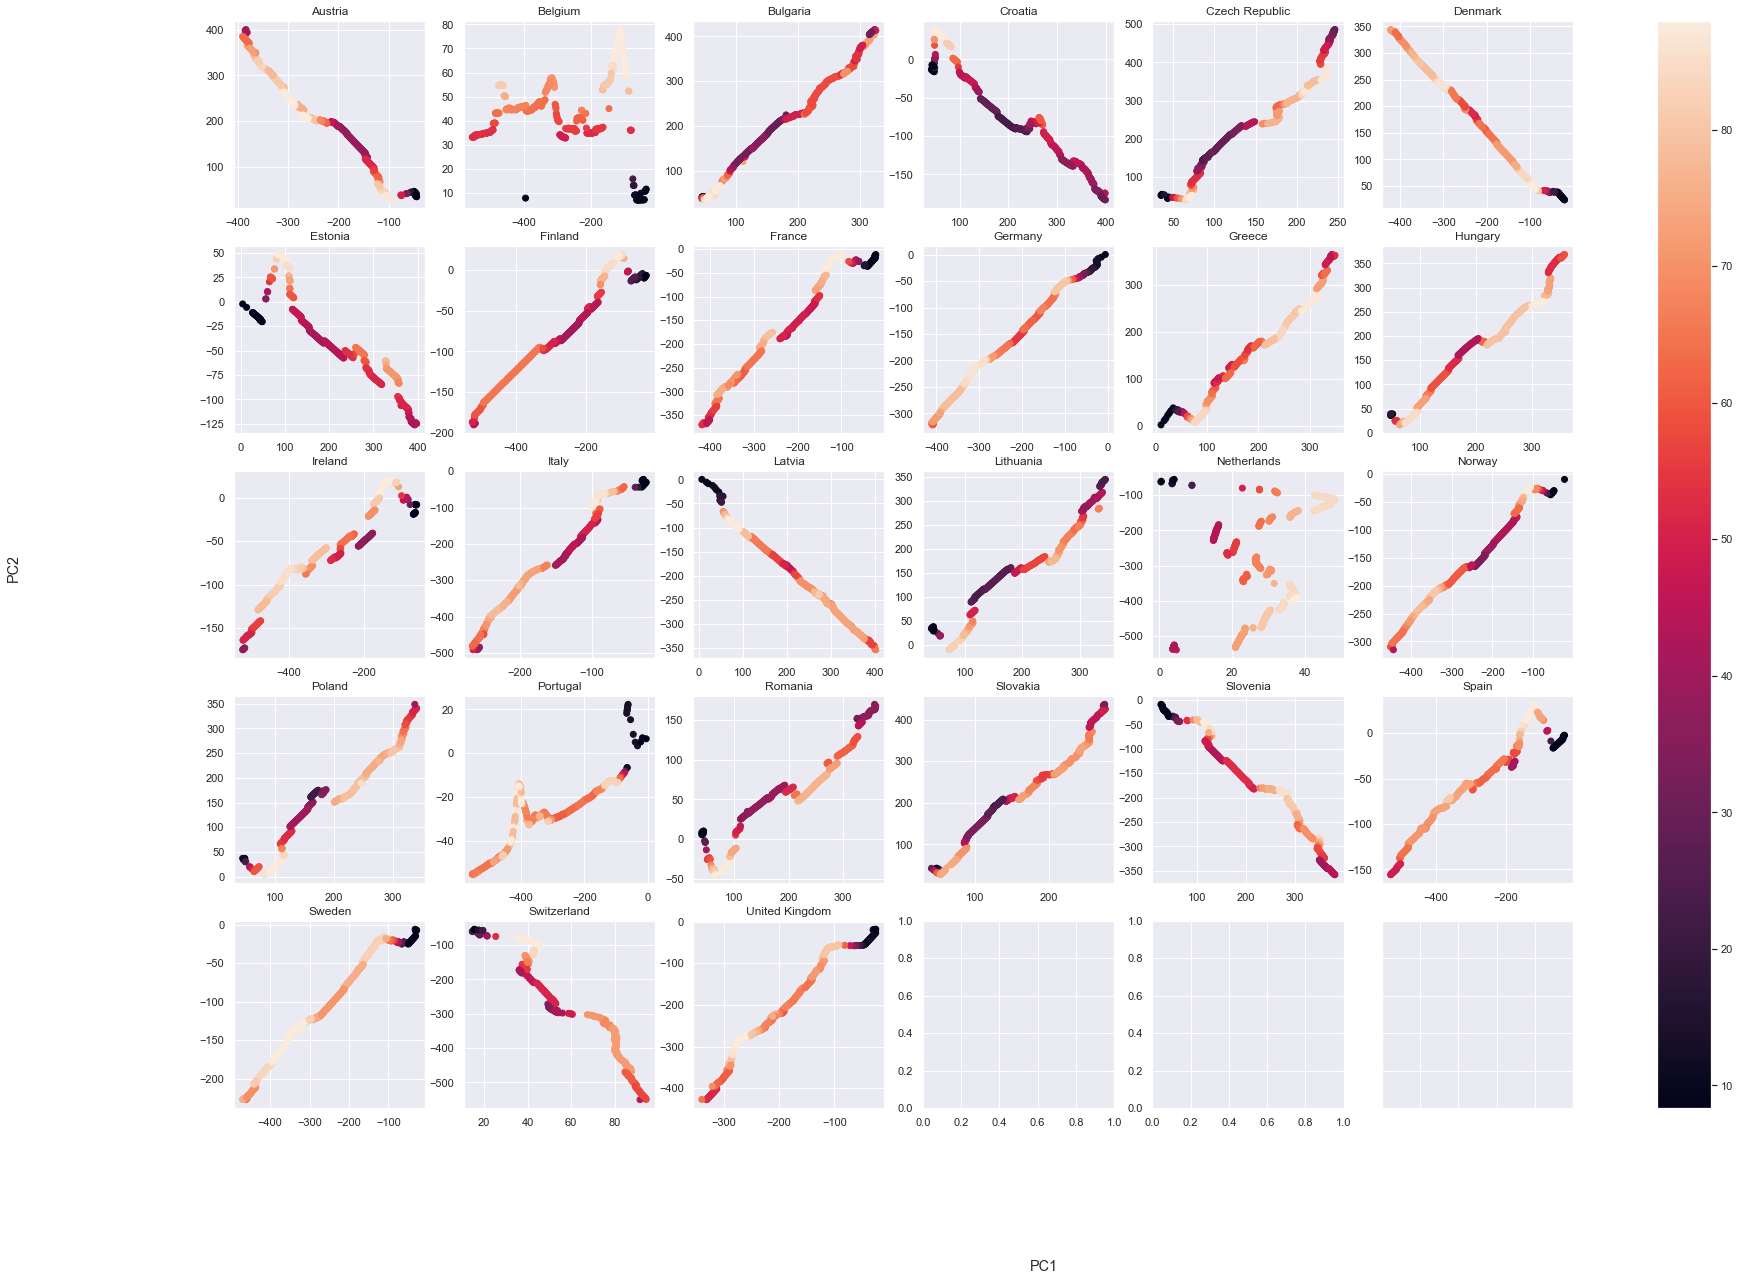

In [101]:

# plt.figure(figsize = (30,40))
fig, axes = plt.subplots(nrows=5, ncols=6, figsize = (30,20))
for i, country in enumerate(np.unique(data["country"])):
    # print(country)
    countryData = data.loc[data['country'] == country]
    countryData = countryData.drop(['country', 'date', 'plurality', 'lr'],axis=1).dropna()
    
    countryData_normalised = pd.DataFrame()
    for col in countryData.columns:
        countryData_normalised[col] = absolute_maximum_scale(countryData[col].astype(float))

    pca = PCA(n_components = 2)
    pca.fit(countryData_normalised)
    countryData_transformed = pca.transform(countryData)
    
    # plt.subplot(5,6,i)
    # plt.figure(figsize=(8,6))
    ax = axes.flat[i]
    coloring = np.array(countryData['stringency_index']).reshape(countryData['stringency_index'].size,1)
    countryData_transformed = np.append(countryData_transformed, coloring, axis=1)
    points = ax.scatter(countryData_transformed[:,0],countryData_transformed[:,1],c=coloring)
    # fg = sns.FacetGrid(data=countryData_transformed, hue='Gender', hue_order=_genders)
    ax.title.set_text(country)
fig.supxlabel('PC1')
fig.supylabel('PC2')
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.colorbar(points, ax=axes.ravel().tolist())

In [71]:
data.head()
data_normalised = pd.DataFrame()
for col in data.columns:
    if col in data.drop(['country', 'date', 'plurality'],axis=1):
        data_normalised[col] = absolute_maximum_scale(data[col])
    else:
        data_normalised[col] = data[col]
        
data_normalised

,id,runday,country,date,new_deaths_smoothed_per_million,stringency_index,median_age,gdp_per_capita,tour_inc_gdp,civilliberties,trustp,icu_bed,lr,plurality,oppfrac,govfrac,checks
0,0.037037,0.658887,Austria,1-1-2021,0.263538,0.855763,0.926931,0.674783,0.483517,0.933333,0.035336,0.452484,0.365451,0,0.731713,0.492369,0.5
1,0.037037,0.714542,Austria,1-2-2021,0.180292,0.855763,0.926931,0.674783,0.483517,0.933333,0.035336,0.452484,0.365451,0,0.731713,0.492369,0.5
2,0.037037,0.109515,Austria,1-3-2020,0.000000,0.115369,0.926931,0.674783,0.483517,0.933333,0.035336,0.452484,0.365451,0,0.731713,0.492369,0.5
3,0.037037,0.764811,Austria,1-3-2021,0.097602,0.788474,0.926931,0.674783,0.483517,0.933333,0.035336,0.452484,0.365451,0,0.731713,0.492369,0.5
4,0.037037,0.165171,Austria,1-4-2020,0.063956,0.846106,0.926931,0.674783,0.483517,0.933333,0.035336,0.452484,0.365451,0,0.731713,0.492369,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13785,0.444444,0.928187,United Kingdom,31-5-2021,0.004310,0.721080,0.851775,0.590377,0.164835,0.900000,-0.556088,-0.235306,0.445681,1,0.537598,0.000000,0.3
13786,0.444444,0.382406,United Kingdom,31-7-2020,0.007404,0.668224,0.851775,0.590377,0.164835,0.900000,-0.556088,-0.235306,0.445681,1,0.537598,0.000000,0.3
13787,0.444444,0.438061,United Kingdom,31-8-2020,0.005109,0.687435,0.851775,0.590377,0.164835,0.900000,-0.556088,-0.235306,0.445681,1,0.537598,0.000000,0.3
13788,0.444444,0.547576,United Kingdom,31-10-2020,0.132395,0.778816,0.851775,0.590377,0.164835,0.900000,-0.556088,-0.235306,0.445681,1,0.537598,0.000000,0.3


Linear regression to predict deaths per day per million

0.2038047358846079

Text(0, 0.5, 'data')

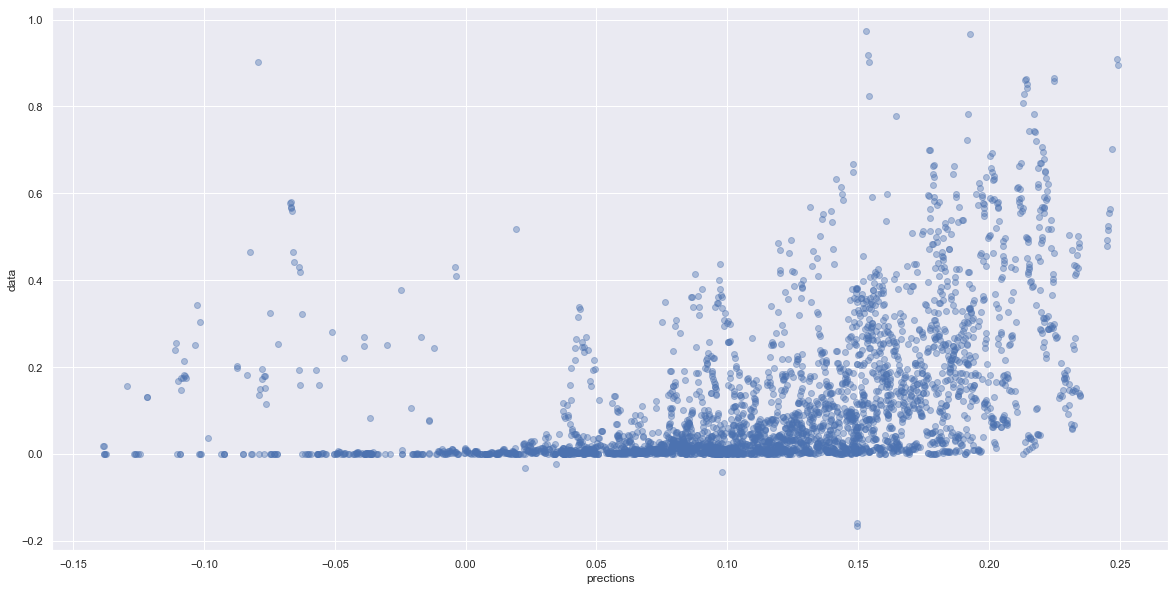

In [126]:

x = data_normalised.drop(['country', 'date', 'plurality', 'new_deaths_smoothed_per_million'],axis=1)
y = data_normalised['new_deaths_smoothed_per_million']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, shuffle=True)


model = LinearRegression().fit(x_train, y_train)
score = model.score(x_test, y_test)
display(score)

model.coef_
plt.figure()
plt.scatter(model.predict(x_test), y_test, alpha = 0.4)
plt.xlabel('prections')
plt.ylabel('data')
# display(model.())

In [117]:
# test

NameError: name 'test' is not defined